## Running topGO

In [1]:
require("topGO")
library(genefilter)
setwd("/home/gstupp/projects/Wolan/cmoon/CM7_CM1E2d56col_unenr123_rawextract_2017/")

Loading required package: topGO
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, as.vector, cbind, colnames,
    do.call, duplicated, eval, evalq, Filter, Find, get, grep, grepl,
    intersect, is.unsorted, lapply, lengths, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unlist, unsplit

Loading required package: graph
Loading required package: Biobase
Welcome to Bioconductor

    Vignettes contai


groupGOTerms: 	GOBPTerm, GOMFTerm, GOCCTerm environments built.



Attaching package: ‘topGO’

The following object is masked from ‘package:IRanges’:

    members


Attaching package: ‘genefilter’

The following object is masked from ‘package:base’:

    anyNA



In [2]:
# load in the deseq results
load("out/res_rt_control")

In [3]:
# load in protein cluster ID -> GO terms mapping
geneID2GO <- readMappings("out/geneid2go.map")
head(geneID2GO)

$`22855681`
[1] "GO:0006090" "GO:0016301" "GO:0003824" "GO:0016310" "GO:0016772"
[6] "GO:0050242" "GO:0005524"

$`49973931`
[1] "GO:0050485" "GO:0055114"

$`61502806`
[1] "GO:0005509" "GO:0005783" "GO:0005515" "GO:0051082" "GO:0006457"

$`17629190`
[1] "GO:0006090" "GO:0016301" "GO:0003824" "GO:0016310" "GO:0016772"
[6] "GO:0050242" "GO:0005524"

$`27803655`
[1] "GO:0016616" "GO:0016491" "GO:0006631" "GO:0055114" "GO:0003857"
[6] "GO:0070403" "GO:0050662"

$`52783963`
[1] "GO:0016620" "GO:0055114"

In [4]:
# load in the count data
load("out/dds_RTcontrol")
# filter out genes with low expression value as well as with very small variability across samples.
selProt <- genefilter(counts(dds), filterfun(kOverA(3, 6), function(x) (IQR(x) > 0.25)))
sum(selProt)
dim(counts(dds))
res=res[selProt,]

[1] 4615

[1] 5610    9

## human_mouse proteins only

In [5]:
# human_mouse proteins only
res_hm = res[res$human_mouse=="True",]

geneList = res_hm$padj
names(geneList)<-rownames(res_hm)

In [6]:
# Tests based on gene counts
# universe is all proteins observed
# "sig" proteins are ones with a (adjusted) p-value < 0.01
topDiffGenes <- function(allScore) { return(allScore < 0.01)}
GOdata <- new("topGOdata", ontology = "BP", allGenes = geneList, geneSel = topDiffGenes, annot = annFUN.gene2GO, gene2GO = geneID2GO)
resultWeight01 <- runTest(GOdata, statistic = "fisher")
# "sig" proteins are determined by rank
resultWeight01ks <- runTest(GOdata, statistic = "ks")


Building most specific GOs .....	( 50 GO terms found. )

Build GO DAG topology ..........	( 292 GO terms and 557 relations. )

Annotating nodes ...............	( 73 genes annotated to the GO terms. )

			 -- Weight01 Algorithm -- 

		 the algorithm is scoring 189 nontrivial nodes
		 parameters: 
			 test statistic:  fisher 

	 Level 13:	1 nodes to be scored	(0 eliminated genes)

	 Level 12:	1 nodes to be scored	(0 eliminated genes)

	 Level 11:	3 nodes to be scored	(1 eliminated genes)

	 Level 10:	9 nodes to be scored	(1 eliminated genes)

	 Level 9:	18 nodes to be scored	(6 eliminated genes)

	 Level 8:	17 nodes to be scored	(7 eliminated genes)

	 Level 7:	18 nodes to be scored	(10 eliminated genes)

	 Level 6:	25 nodes to be scored	(16 eliminated genes)

	 Level 5:	39 nodes to be scored	(22 eliminated genes)

	 Level 4:	32 nodes to be scored	(49 eliminated genes)

	 Level 3:	17 nodes to be scored	(54 eliminated genes)

	 Level 2:	8 nodes to be scored	(64 eliminated genes)

	 Level

In [7]:
GenTable(GOdata, resultWeight01, topNodes = 10)

GO.ID,Term,Annotated,Significant,Expected,result1
GO:0005975,carbohydrate metabolic process,9,5,2.34,0.046
GO:0045087,innate immune response,2,2,0.52,0.065
GO:0050727,regulation of inflammatory response,2,2,0.52,0.065
GO:0006952,defense response,5,4,1.30,0.140
GO:0045454,cell redox homeostasis,3,2,0.78,0.164
GO:0055114,oxidation-reduction process,7,3,1.82,0.258
GO:0006979,response to oxidative stress,1,1,0.26,0.260
GO:0006749,glutathione metabolic process,1,1,0.26,0.260
GO:0019882,antigen processing and presentation,1,1,0.26,0.260
GO:0006414,translational elongation,1,1,0.26,0.260


In [8]:
GenTable(GOdata, resultWeight01ks, topNodes = 10)

GO.ID,Term,Annotated,Significant,Expected,result1
GO:0045087,innate immune response,2,2,0.52,0.023
GO:0050727,regulation of inflammatory response,2,2,0.52,0.023
GO:0006952,defense response,5,4,1.30,0.035
GO:0045454,cell redox homeostasis,3,2,0.78,0.047
GO:0005975,carbohydrate metabolic process,9,5,2.34,0.092
GO:0006032,chitin catabolic process,1,1,0.26,0.147
GO:0019882,antigen processing and presentation,1,1,0.26,0.163
GO:0044262,cellular carbohydrate metabolic process,2,1,0.52,0.169
GO:0006749,glutathione metabolic process,1,1,0.26,0.172
GO:0006096,glycolytic process,1,1,0.26,0.200


In [9]:
# same thing using GO MF
GOdataMF <- new("topGOdata", ontology = "MF", allGenes = geneList, geneSel = topDiffGenes, annot = annFUN.gene2GO, gene2GO = geneID2GO)
resultWeight01MF <- runTest(GOdataMF, statistic = "fisher")
resultWeight01ksMF <- runTest(GOdataMF, statistic = "ks")


Building most specific GOs .....	( 82 GO terms found. )

Build GO DAG topology ..........	( 205 GO terms and 267 relations. )

Annotating nodes ...............	( 101 genes annotated to the GO terms. )

			 -- Weight01 Algorithm -- 

		 the algorithm is scoring 133 nontrivial nodes
		 parameters: 
			 test statistic:  fisher 

	 Level 10:	1 nodes to be scored	(0 eliminated genes)

	 Level 9:	3 nodes to be scored	(0 eliminated genes)

	 Level 8:	8 nodes to be scored	(2 eliminated genes)

	 Level 7:	14 nodes to be scored	(5 eliminated genes)

	 Level 6:	27 nodes to be scored	(12 eliminated genes)

	 Level 5:	28 nodes to be scored	(32 eliminated genes)

	 Level 4:	25 nodes to be scored	(51 eliminated genes)

	 Level 3:	20 nodes to be scored	(66 eliminated genes)

	 Level 2:	6 nodes to be scored	(74 eliminated genes)

	 Level 1:	1 nodes to be scored	(99 eliminated genes)

			 -- Weight01 Algorithm -- 

		 the algorithm is scoring 205 nontrivial nodes
		 parameters: 
			 test statistic:  ks

In [10]:
GenTable(GOdataMF, resultWeight01MF, topNodes = 10)

GO.ID,Term,Annotated,Significant,Expected,result1
GO:0005544,calcium-dependent phospholipid binding,5,5,1.58,0.0025
GO:0005509,calcium ion binding,9,7,2.85,0.0041
GO:0004866,endopeptidase inhibitor activity,6,4,1.90,0.0296
GO:0004859,phospholipase inhibitor activity,3,3,0.95,0.0298
GO:0008092,cytoskeletal protein binding,4,4,1.27,0.0897
GO:0008017,microtubule binding,2,2,0.63,0.0982
GO:0050544,arachidonic acid binding,2,2,0.63,0.0982
GO:0050786,RAGE receptor binding,2,2,0.63,0.0982
GO:0035662,Toll-like receptor 4 binding,2,2,0.63,0.0982
GO:0030246,carbohydrate binding,7,4,2.22,0.1408


In [11]:
GenTable(GOdataMF, resultWeight01ksMF, topNodes = 10)

GO.ID,Term,Annotated,Significant,Expected,result1
GO:0005544,calcium-dependent phospholipid binding,5,5,1.58,0.0064
GO:0030246,carbohydrate binding,7,4,2.22,0.0124
GO:0005509,calcium ion binding,9,7,2.85,0.0125
GO:0004859,phospholipase inhibitor activity,3,3,0.95,0.0228
GO:0050786,RAGE receptor binding,2,2,0.63,0.0232
GO:0035662,Toll-like receptor 4 binding,2,2,0.63,0.0232
GO:0008017,microtubule binding,2,2,0.63,0.0232
GO:0050544,arachidonic acid binding,2,2,0.63,0.0232
GO:0004866,endopeptidase inhibitor activity,6,4,1.90,0.0322
GO:0008092,cytoskeletal protein binding,4,4,1.27,0.0743


## Non -human/mouse

In [12]:
res_nh = res[res$human_mouse=="False",]

geneList = res_nh$padj
names(geneList)<-rownames(res_nh)
length(geneList)

[1] 4463

In [13]:
GOdataBP <- new("topGOdata", ontology = "BP", allGenes = geneList, geneSel = topDiffGenes, annot = annFUN.gene2GO, gene2GO = geneID2GO)
resultWeight01BP <- runTest(GOdataBP, statistic = "fisher")
resultWeight01ksBP <- runTest(GOdataBP, statistic = "ks")


Building most specific GOs .....	( 170 GO terms found. )

Build GO DAG topology ..........	( 546 GO terms and 1107 relations. )

Annotating nodes ...............	( 3558 genes annotated to the GO terms. )

			 -- Weight01 Algorithm -- 

		 the algorithm is scoring 213 nontrivial nodes
		 parameters: 
			 test statistic:  fisher 

	 Level 13:	2 nodes to be scored	(0 eliminated genes)

	 Level 12:	3 nodes to be scored	(0 eliminated genes)

	 Level 11:	8 nodes to be scored	(321 eliminated genes)

	 Level 10:	19 nodes to be scored	(330 eliminated genes)

	 Level 9:	31 nodes to be scored	(368 eliminated genes)

	 Level 8:	27 nodes to be scored	(816 eliminated genes)

	 Level 7:	20 nodes to be scored	(1348 eliminated genes)

	 Level 6:	29 nodes to be scored	(2308 eliminated genes)

	 Level 5:	30 nodes to be scored	(2403 eliminated genes)

	 Level 4:	24 nodes to be scored	(2589 eliminated genes)

	 Level 3:	13 nodes to be scored	(2705 eliminated genes)

	 Level 2:	6 nodes to be scored	(3344 e

In [14]:
GenTable(GOdataBP, resultWeight01BP, topNodes = 10)

GO.ID,Term,Annotated,Significant,Expected,result1
GO:0015768,maltose transport,4,4,0.13,1.2e-06
GO:0006096,glycolytic process,259,20,8.74,0.00032
GO:0019512,lactose catabolic process via tagatose-6...,2,2,0.07,0.00113
GO:0006099,tricarboxylic acid cycle,2,2,0.07,0.00113
GO:0006108,malate metabolic process,7,3,0.24,0.00119
GO:0006457,protein folding,35,5,1.18,0.00162
GO:0006412,translation,464,29,15.65,0.00192
GO:0009401,phosphoenolpyruvate-dependent sugar phos...,14,3,0.47,0.01037
GO:0005975,carbohydrate metabolic process,753,45,25.40,0.02318
GO:0016485,protein processing,1,1,0.03,0.03373


In [15]:
GenTable(GOdataBP, resultWeight01ksBP, topNodes = 10)

GO.ID,Term,Annotated,Significant,Expected,result1
GO:0006810,transport,243,14,8.20,5.6e-17
GO:0006412,translation,464,29,15.65,9.9e-12
GO:0005975,carbohydrate metabolic process,753,45,25.40,2.7e-10
GO:0006090,pyruvate metabolic process,551,20,18.58,1.4e-09
GO:0006814,sodium ion transport,17,0,0.57,3.8e-09
GO:0016310,phosphorylation,585,21,19.73,4.0e-07
GO:0009401,phosphoenolpyruvate-dependent sugar phos...,14,3,0.47,1.1e-06
GO:0005996,monosaccharide metabolic process,188,7,6.34,1.3e-06
GO:0009082,branched-chain amino acid biosynthetic p...,37,0,1.25,1.9e-06
GO:0006438,valyl-tRNA aminoacylation,16,0,0.54,5.3e-06


In [16]:
# Molecular function
GOdataMF <- new("topGOdata", ontology = "MF", allGenes = geneList, geneSel = topDiffGenes, annot = annFUN.gene2GO, gene2GO = geneID2GO)
resultWeight01MF <- runTest(GOdataMF, statistic = "fisher")
resultWeight01ksMF <- runTest(GOdataMF, statistic = "ks")


Building most specific GOs .....	( 280 GO terms found. )

Build GO DAG topology ..........	( 447 GO terms and 535 relations. )

Annotating nodes ...............	( 3889 genes annotated to the GO terms. )

			 -- Weight01 Algorithm -- 

		 the algorithm is scoring 170 nontrivial nodes
		 parameters: 
			 test statistic:  fisher 

	 Level 14:	1 nodes to be scored	(0 eliminated genes)

	 Level 13:	2 nodes to be scored	(0 eliminated genes)

	 Level 12:	1 nodes to be scored	(62 eliminated genes)

	 Level 11:	1 nodes to be scored	(62 eliminated genes)

	 Level 10:	1 nodes to be scored	(62 eliminated genes)

	 Level 9:	4 nodes to be scored	(62 eliminated genes)

	 Level 8:	9 nodes to be scored	(62 eliminated genes)

	 Level 7:	22 nodes to be scored	(972 eliminated genes)

	 Level 6:	40 nodes to be scored	(1040 eliminated genes)

	 Level 5:	35 nodes to be scored	(1658 eliminated genes)

	 Level 4:	28 nodes to be scored	(2004 eliminated genes)

	 Level 3:	20 nodes to be scored	(2751 eliminated 

In [17]:
GenTable(GOdataMF, resultWeight01MF, topNodes=10)

GO.ID,Term,Annotated,Significant,Expected,result1
GO:0005363,maltose transmembrane transporter activi...,4,4,0.15,1.8e-06
GO:0051920,peroxiredoxin activity,8,5,0.30,3.3e-06
GO:0005509,calcium ion binding,3,3,0.11,5.0e-05
GO:0004618,phosphoglycerate kinase activity,72,11,2.67,5.3e-05
GO:0005525,GTP binding,215,20,7.96,9.8e-05
GO:0003735,structural constituent of ribosome,296,24,10.96,0.00017
GO:0009045,xylose isomerase activity,10,4,0.37,0.00032
GO:0051082,unfolded protein binding,11,4,0.41,0.00049
GO:0033920,6-phospho-beta-galactosidase activity,2,2,0.07,0.00136
GO:0004802,transketolase activity,3,2,0.11,0.00399


In [18]:
GenTable(GOdataMF, resultWeight01ksMF, topNodes = 10)

GO.ID,Term,Annotated,Significant,Expected,result1
GO:0016887,ATPase activity,166,5,6.15,4.3e-19
GO:0003824,catalytic activity,3075,87,113.86,1.9e-12
GO:0016820,"hydrolase activity, acting on acid anhyd...",138,4,5.11,2.3e-12
GO:0003735,structural constituent of ribosome,296,24,10.96,3.5e-11
GO:0046872,metal ion binding,378,17,14.00,8.6e-10
GO:0016740,transferase activity,1198,33,44.36,1.9e-09
GO:0050242,"pyruvate, phosphate dikinase activity",286,0,10.59,2.5e-09
GO:0016301,kinase activity,407,13,15.07,6.0e-08
GO:0016829,lyase activity,239,8,8.85,1.4e-07
GO:0008861,formate C-acetyltransferase activity,20,3,0.74,2.4e-07


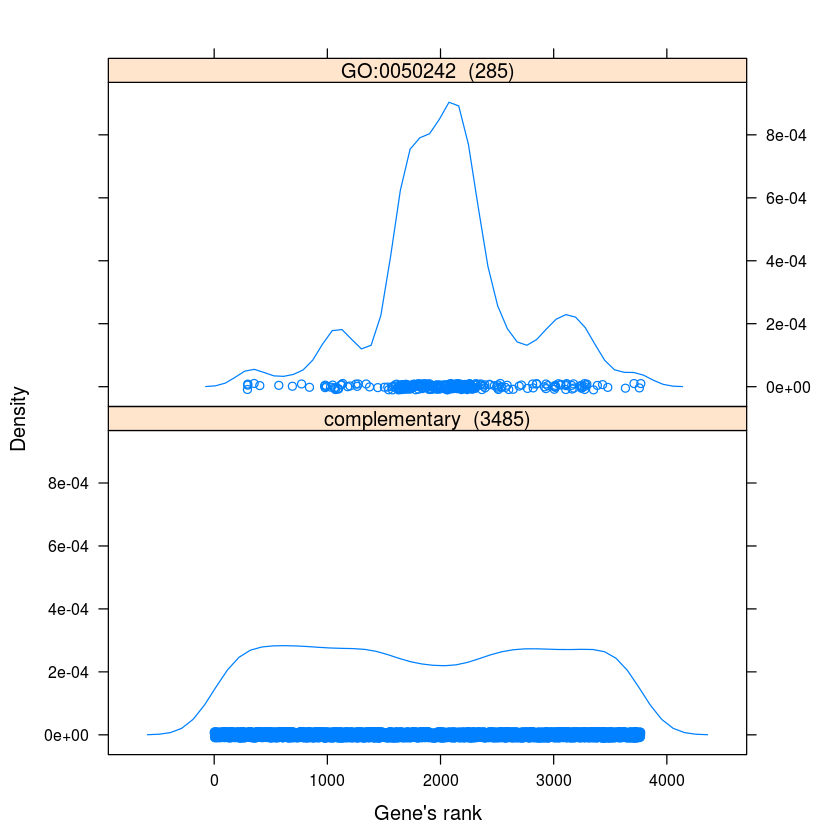

In [19]:
print(showGroupDensity(GOdataMF, "GO:0050242", ranks = TRUE))